In [1]:
# 4/25 기준
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
qa = pipeline("question-answering")
sentiment = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)
2022-05-04 16:19:08.175289: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
All model checkpoint layers were used when initializing TFDistilBertForQuestionAnswering.

All the layers of TFDistilBertForQuestionAnswering were initialized from the model checkpoint at distilbert-base-cased-distilled-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDi

In [2]:
from pykrx import stock
pykrx_df = stock.get_market_ohlcv_by_date(fromdate='2021-04-25', todate='2022-04-25', ticker="035720", adjusted=False)
pykrx = pykrx_df.reset_index()

In [3]:
target = pd.DataFrame(pykrx.loc[:,['날짜','등락률']]).reset_index()
target = target.drop('index',axis=1)
target['날짜'] = pd.to_datetime(target['날짜'],format='%Y-%m-%d')

target

,날짜,등락률
0,2021-04-26,0.43
1,2021-04-27,2.97
2,2021-04-28,-1.65
3,2021-04-29,-2.09
4,2021-04-30,-2.99
...,...,...
242,2022-04-19,0.74
243,2022-04-20,0.00
244,2022-04-21,-1.58
245,2022-04-22,-1.71


In [30]:
resampled_target = pd.DataFrame(target.resample(rule='1W', on='날짜'))
resampled_target

temp = []
for i in range(len(resampled_target)):
    temp.append(resampled_target[1][i].mean())

week_rate_mean = pd.DataFrame(temp)
week_rate_mean.to_csv('/Users/junho/Desktop/data/final_csv/kakao_rate_mean.csv')

/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_8859/722278786.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp.append(resampled_target[1][i].mean())


In [5]:
translated_article = list(pd.read_csv('/Users/junho/Desktop/data/final_csv/translate_article.csv')['0'])
date = list(pd.read_csv('/Users/junho/Desktop/data/final_csv/date.csv')['data'])

article_table = pd.DataFrame()
article_table['date'] = date
article_table['translated_article'] = translated_article
article_table['date'] = pd.to_datetime(article_table['date'],format='%Y-%m-%d')
article_table

,date,translated_article
0,2022-04-25,"73 52 -weeks, including Naver, is a high -end ..."
1,2022-04-25,-This 35 million residents of Chao Yang-gu thr...
2,2022-04-21,Mirae Asset Securities announced on the 21st t...
3,2022-04-20,Korea Investment & Securities Korea Investment...
4,2022-04-18,NAVER sales of 1.8 trillion won and Kakao sale...
...,...,...
437,2021-05-03,Reporter Shin Woong -su = KOSPI index is appea...
438,2021-05-02,KOSPI and KOSDAQ showed four consecutive days ...
439,2021-05-02,KOSPI and KOSDAQ showed four consecutive days ...
440,2021-04-29,Investors are already consulting at the Korea ...


In [18]:
question = 'Is cacao growing??'
data = []
for i in range(len(translated_article)):
    ans = qa(question = question, context = translated_article[i])
    senti = sentiment(ans.get('answer'))
    print(ans)
    print(senti)
    data.append(senti)

/Users/junho/tensorflow_macos_venv/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/Users/junho/tensorflow_macos_venv/lib/python3.8/site-packages/transformers/pipelines/question_answering.py:298: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_mask = np.asarray(


{'score': 0.03593302145600319, 'start': 79, 'end': 131, 'answer': 'the march is continuing in the domestic stock market'}
[{'label': 'POSITIVE', 'score': 0.9765607714653015}]
{'score': 0.2556398808956146, 'start': 1428, 'end': 1512, 'answer': 'the number of infections that began in six people on the 22nd is gradually spreading'}
[{'label': 'NEGATIVE', 'score': 0.9835265278816223}]
{'score': 0.015292112715542316, 'start': 797, 'end': 824, 'answer': 'ELW -only KakaoTalk channel'}
[{'label': 'NEGATIVE', 'score': 0.9961898326873779}]
{'score': 0.25515639781951904, 'start': 1146, 'end': 1173, 'answer': 'KakaoTalk channel True ELW.'}
[{'label': 'POSITIVE', 'score': 0.968518853187561}]
{'score': 0.06517355889081955, 'start': 36, 'end': 90, 'answer': 'Kakao sales of 1.7 trillion trillion trillion trillion'}
[{'label': 'POSITIVE', 'score': 0.907615065574646}]
{'score': 0.03175114095211029, 'start': 356, 'end': 380, 'answer': 'reverse growth is caught'}
[{'label': 'POSITIVE', 'score': 0.75276619

{'score': 0.08049185574054718, 'start': 2273, 'end': 2334, 'answer': 'transactions on the stock market is the expansion of the base'}
[{'label': 'POSITIVE', 'score': 0.9950078725814819}]
{'score': 0.02509353868663311, 'start': 1067, 'end': 1089, 'answer': 'expand the base of ELW'}
[{'label': 'POSITIVE', 'score': 0.9994342923164368}]
{'score': 0.06688375771045685, 'start': 3471, 'end': 3514, 'answer': 'excellent role in expanding public opinions'}
[{'label': 'POSITIVE', 'score': 0.9998515844345093}]
{'score': 0.05766226351261139, 'start': 1159, 'end': 1175, 'answer': '2030 generations'}
[{'label': 'POSITIVE', 'score': 0.9991835951805115}]
{'score': 0.06499012559652328, 'start': 724, 'end': 741, 'answer': 'It is in progress'}
[{'label': 'POSITIVE', 'score': 0.9994015693664551}]
{'score': 0.03205904737114906, 'start': 306, 'end': 366, 'answer': 'Concerns over Ukrainian tensions and interest rates continue'}
[{'label': 'NEGATIVE', 'score': 0.9377278685569763}]
{'score': 0.01343235280364751

{'score': 0.1417807787656784, 'start': 239, 'end': 274, 'answer': 'individual investors are increasing'}
[{'label': 'POSITIVE', 'score': 0.997653067111969}]
{'score': 0.1278786063194275, 'start': 1174, 'end': 1202, 'answer': 'increase in the 14th quarter'}
[{'label': 'POSITIVE', 'score': 0.996119499206543}]
{'score': 0.012217864394187927, 'start': 1097, 'end': 1149, 'answer': "We expect Keika's market share to fall in the market"}
[{'label': 'NEGATIVE', 'score': 0.9993141889572144}]
{'score': 0.02734074555337429, 'start': 119, 'end': 149, 'answer': 'It is a disgraceful retirement'}
[{'label': 'NEGATIVE', 'score': 0.9995204210281372}]
{'score': 0.1952153444290161, 'start': 78, 'end': 115, 'answer': 'the company has lost its new business'}
[{'label': 'NEGATIVE', 'score': 0.9997444748878479}]
{'score': 0.16608521342277527, 'start': 1190, 'end': 1210, 'answer': 'KOSDAQ dropped 3.75%'}
[{'label': 'NEGATIVE', 'score': 0.998345136642456}]
{'score': 0.08743513375520706, 'start': 667, 'end': 73

{'score': 0.0950860008597374, 'start': 3199, 'end': 3260, 'answer': 'The inflation of the US and China has grown over expectations'}
[{'label': 'NEGATIVE', 'score': 0.9653968214988708}]
{'score': 0.061961494386196136, 'start': 1401, 'end': 1436, 'answer': 'We have selected platform companies'}
[{'label': 'POSITIVE', 'score': 0.9964620471000671}]
{'score': 0.3184373080730438, 'start': 136, 'end': 182, 'answer': 'aggressively strengthening the overseas market'}
[{'label': 'POSITIVE', 'score': 0.9977890253067017}]
{'score': 0.12829746305942535, 'start': 3259, 'end': 3269, 'answer': 'only 1.91%'}
[{'label': 'NEGATIVE', 'score': 0.9785803556442261}]
{'score': 0.018420496955513954, 'start': 879, 'end': 894, 'answer': 'Valhalla Rising'}
[{'label': 'POSITIVE', 'score': 0.9990725517272949}]
{'score': 0.046000104397535324, 'start': 839, 'end': 914, 'answer': 'The diversification strategy of the console business has been in full swing'}
[{'label': 'POSITIVE', 'score': 0.9938661456108093}]
{'score

{'score': 0.15284660458564758, 'start': 282, 'end': 346, 'answer': 'the problem is undervalued in consideration of growth and growth'}
[{'label': 'NEGATIVE', 'score': 0.9776380062103271}]
{'score': 0.009122190997004509, 'start': 144, 'end': 206, 'answer': 'Investment opinions and target prices have not been presented.'}
[{'label': 'NEGATIVE', 'score': 0.9924607872962952}]
{'score': 0.19377940893173218, 'start': 1523, 'end': 1591, 'answer': 'increase in PC demand is slowing due to the expansion of vaccination'}
[{'label': 'NEGATIVE', 'score': 0.9979143738746643}]
{'score': 0.020861420780420303, 'start': 10, 'end': 60, 'answer': 'domestic stocks have not been able to get stronger'}
[{'label': 'NEGATIVE', 'score': 0.9995098114013672}]
{'score': 0.01990576460957527, 'start': 32, 'end': 57, 'answer': 'rebounded and are strong.'}
[{'label': 'POSITIVE', 'score': 0.9998593330383301}]
{'score': 0.10748519003391266, 'start': 1533, 'end': 1584, 'answer': 'the global business will be expanded in t

{'score': 0.04083769768476486, 'start': 2508, 'end': 2537, 'answer': 'investors are becoming mature'}
[{'label': 'POSITIVE', 'score': 0.9996857643127441}]
{'score': 0.018772989511489868, 'start': 81, 'end': 116, 'answer': 'Kakao Bank is trading at 82,000 won'}
[{'label': 'POSITIVE', 'score': 0.9942388534545898}]
{'score': 0.10719173401594162, 'start': 1313, 'end': 1363, 'answer': 'all block deals worth 1 trillion won were digested'}
[{'label': 'NEGATIVE', 'score': 0.9958798885345459}]
{'score': 0.5288392901420593, 'start': 1263, 'end': 1282, 'answer': 'steadily increasing'}
[{'label': 'POSITIVE', 'score': 0.9988105297088623}]
{'score': 0.22054004669189453, 'start': 954, 'end': 994, 'answer': 'Kakao Bank is showing a significant rise'}
[{'label': 'POSITIVE', 'score': 0.9995005130767822}]
{'score': 0.07211937010288239, 'start': 38, 'end': 60, 'answer': 'stock prices plummeted'}
[{'label': 'NEGATIVE', 'score': 0.9996770620346069}]
{'score': 0.19881105422973633, 'start': 1219, 'end': 1223,

{'score': 0.23854999244213104, 'start': 417, 'end': 441, 'answer': 'It is the growth of Odin'}
[{'label': 'POSITIVE', 'score': 0.9970169067382812}]
{'score': 0.031812380999326706, 'start': 1305, 'end': 1371, 'answer': 'Expansion and growth is different from traditional financial firms'}
[{'label': 'POSITIVE', 'score': 0.9992449283599854}]
{'score': 0.23392359912395477, 'start': 1562, 'end': 1589, 'answer': "It's hard to expect to rise"}
[{'label': 'POSITIVE', 'score': 0.9977527260780334}]
{'score': 0.23863093554973602, 'start': 1479, 'end': 1506, 'answer': "It's hard to expect to rise"}
[{'label': 'POSITIVE', 'score': 0.9977527260780334}]
{'score': 0.3282698690891266, 'start': 316, 'end': 353, 'answer': 'Kakao rose 3.82%from the previous day'}
[{'label': 'POSITIVE', 'score': 0.9981879591941833}]
{'score': 0.323865681886673, 'start': 284, 'end': 321, 'answer': 'Kakao rose 3.82%from the previous day'}
[{'label': 'POSITIVE', 'score': 0.9981879591941833}]
{'score': 0.000417421106249094, 's

{'score': 0.18260440230369568, 'start': 475, 'end': 519, 'answer': 'the media content market using IP is growing'}
[{'label': 'POSITIVE', 'score': 0.9797009229660034}]
{'score': 0.02424868755042553, 'start': 58, 'end': 98, 'answer': 'has soared with its opening on the 13th.'}
[{'label': 'POSITIVE', 'score': 0.9998509883880615}]
{'score': 0.1229294165968895, 'start': 136, 'end': 155, 'answer': 'NCsoft Summers Wars'}
[{'label': 'NEGATIVE', 'score': 0.9817743301391602}]
{'score': 0.0653969943523407, 'start': 336, 'end': 347, 'answer': 'rising 236%'}
[{'label': 'POSITIVE', 'score': 0.9991808533668518}]
{'score': 0.10863262414932251, 'start': 1398, 'end': 1435, 'answer': 'there is no concern about the success'}
[{'label': 'NEGATIVE', 'score': 0.9984886646270752}]
{'score': 0.03506055846810341, 'start': 2315, 'end': 2341, 'answer': 'Kakao Games beat Celltrion'}
[{'label': 'POSITIVE', 'score': 0.987153947353363}]
{'score': 0.14616794884204865, 'start': 526, 'end': 580, 'answer': 'Kakao Games 

{'score': 0.2607988715171814, 'start': 1056, 'end': 1092, 'answer': 'contributions in the Kakao community'}
[{'label': 'POSITIVE', 'score': 0.9997583031654358}]
{'score': 0.07546193152666092, 'start': 1692, 'end': 1718, 'answer': "Subsidies' growth momentum"}
[{'label': 'POSITIVE', 'score': 0.9985684156417847}]
{'score': 0.21741104125976562, 'start': 2992, 'end': 3068, 'answer': 'The proportion of smart store transactions in shopping is steadily expanding'}
[{'label': 'POSITIVE', 'score': 0.9989374279975891}]
{'score': 0.08922804892063141, 'start': 673, 'end': 720, 'answer': 'Kakao rose last week for five consecutive days.'}
[{'label': 'POSITIVE', 'score': 0.9826487302780151}]
{'score': 0.08400171995162964, 'start': 2188, 'end': 2241, 'answer': 'a time to prepare for the transition to growth stocks'}
[{'label': 'POSITIVE', 'score': 0.9923813939094543}]
{'score': 0.2591007649898529, 'start': 1001, 'end': 1094, 'answer': "Overseas stocks have a foundation for expanding consumers' opportu

In [19]:
score = []
for i in data:
    if i[0]['label'] == 'NEGATIVE':
        score.append(-i[0]['score'])
    else:
        score.append(i[0]['score'])

len(score)

442

In [20]:
date_score = pd.DataFrame()
date_score['date'] = date
date_score['date'] = pd.to_datetime(date_score['date'],format='%Y-%m-%d')


date_score['score'] = score

resampled_week = pd.DataFrame(date_score.resample(rule='1W', on='date'))

temp = []
for i in range(len(resampled_week)):
    temp.append(resampled_week[1][i].mean().score)

week_mean = pd.DataFrame(temp)

/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_8859/1042392469.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp.append(resampled_week[1][i].mean().score)


In [11]:
question_tbl = pd.DataFrame()

In [21]:
#question_tbl['question1'] = week_mean # 'Will the stock price of cacao go up?'
#question_tbl['question2'] = week_mean # 'Is cacao growing?'
question_tbl['question3'] = week_mean # 'Is cacao growing?'

question_tbl

,question1,question2,question3
0,-0.503562,-0.501771,0.407641
1,0.715384,0.496300,0.264348
2,0.454324,0.406858,0.598848
3,-0.176874,-0.170329,0.230392
4,0.707713,0.164453,0.429568
5,0.986117,0.985687,0.566711
6,0.924912,0.990395,0.989232
7,0.319667,0.217349,0.623820
8,0.802863,0.342514,0.530058
9,-0.198102,0.072171,0.708974


In [9]:
split_score_df = week_mean
split_span = 10
split_list = []

for i in range(len(split_score_df)-split_span):
    split_list.append(split_score_df[i:i+split_span].mean())


NameError: name 'week_mean' is not defined

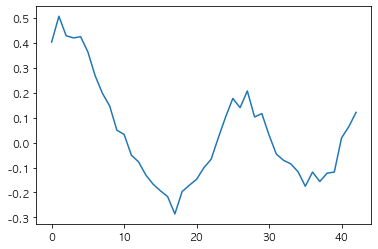

In [38]:
plt.plot(split_list)

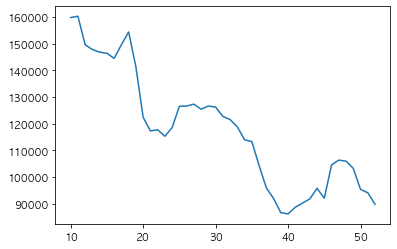

In [60]:
plt.plot(week_price_mean['Close'][split_span:])

In [31]:
week_rate_mean

,등락률
0,-0.6660
1,0.2225
2,-0.9700
3,1.7900
4,0.8660
5,0.3400
6,1.7940
7,2.7520
8,0.0440
9,0.6540


In [33]:
sub_df = question_tbl
#sub_df['mean_price'] = week_price_mean['Close']
sub_df['mean_rate'] = week_rate_mean['등락률']
sub_df

,question1,question2,question3,mean_price,mean_rate
0,-0.503562,-0.501771,0.407641,117900.0,-0.6660
1,0.715384,0.496300,0.264348,114875.0,0.2225
2,0.454324,0.406858,0.598848,112400.0,-0.9700
3,-0.176874,-0.170329,0.230392,113500.0,1.7900
4,0.707713,0.164453,0.429568,120200.0,0.8660
5,0.986117,0.985687,0.566711,125500.0,0.3400
6,0.924912,0.990395,0.989232,130500.0,1.7940
7,0.319667,0.217349,0.623820,146600.0,2.7520
8,0.802863,0.342514,0.530058,159000.0,0.0440
9,-0.198102,0.072171,0.708974,159100.0,0.6540


<AxesSubplot:>

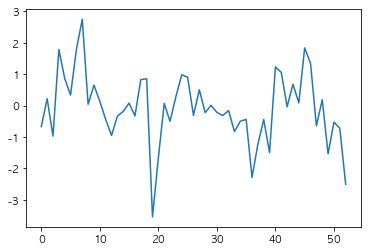

In [34]:
sub_df['mean_rate'].plot()

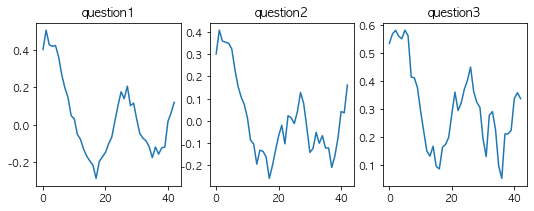

In [29]:
split_score_df = sub_df
split_span = 10
split_list = []
fig = plt.figure(figsize=(15,3))
for idx in range(3): # column
    temp = []
    for i in range(len(split_score_df.iloc[:,idx])-split_span):
        temp.append(split_score_df.iloc[i:i+split_span,idx].mean())
    split_list.append(temp)
    fig = plt.subplot(1,5,idx+1)
    plt.plot(temp)
    plt.title(split_score_df.columns[idx])


In [39]:
len(split_list[0]) == len(sub_df.loc[split_span:,'mean_rate'])

True

In [41]:
sub_df

,question1,question2,question3,mean_price,mean_rate
0,-0.503562,-0.501771,0.407641,117900.0,-0.6660
1,0.715384,0.496300,0.264348,114875.0,0.2225
2,0.454324,0.406858,0.598848,112400.0,-0.9700
3,-0.176874,-0.170329,0.230392,113500.0,1.7900
4,0.707713,0.164453,0.429568,120200.0,0.8660
5,0.986117,0.985687,0.566711,125500.0,0.3400
6,0.924912,0.990395,0.989232,130500.0,1.7940
7,0.319667,0.217349,0.623820,146600.0,2.7520
8,0.802863,0.342514,0.530058,159000.0,0.0440
9,-0.198102,0.072171,0.708974,159100.0,0.6540


<AxesSubplot:>

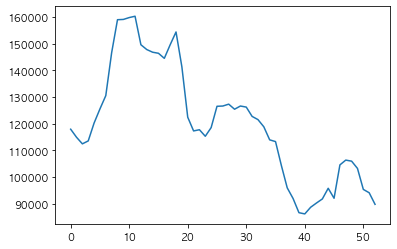

In [157]:
sub_df['mean_price'].plot()

In [52]:
target_df = pd.DataFrame(split_list)
target_df = target_df.transpose()
target_df

,0,1,2
0,0.403244,0.300363,0.534959
1,0.506612,0.407187,0.568617
2,0.428361,0.358047,0.581639
3,0.419860,0.352944,0.560045
4,0.424471,0.348540,0.551631
5,0.363426,0.322301,0.582211
6,0.267978,0.229830,0.561743
7,0.197976,0.155141,0.414509
8,0.147058,0.106668,0.412003
9,0.049711,0.072650,0.376271


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
quad = PolynomialFeatures(degree=3,include_bias=False) # ,include_bias=False
input_idx = len(target_df) - 1

features = [0,1,2]

X = target_df.loc[:input_idx,features]
y = sub_df.loc[:input_idx,'mean_rate']
X_quad = quad.fit_transform(X)
lr.fit(X_quad,y)
y_quad_fit = lr.predict(quad.fit_transform(X))

pred = y_quad_fit

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(pred,y)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(pred,y)) # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음
print(1-(1-r2_score(pred,y))*(input_idx-1)/(input_idx-len(features)))

0.6868412705560801
0.3239922701058724
0.2893252070343787


In [159]:
len(X)

43

In [173]:
y = y.reset_index().drop('index',axis=1)

In [174]:
temp_score_df = target_df
temp_score_df['y'] = y
temp_score_df['pred'] = pred
temp_score_df

,0,1,2,pred,y
0,0.403244,0.300363,0.534959,-0.329283,-0.6660
1,0.506612,0.407187,0.568617,0.073022,0.2225
2,0.428361,0.358047,0.581639,-0.344184,-0.9700
3,0.419860,0.352944,0.560045,0.903947,1.7900
4,0.424471,0.348540,0.551631,0.798814,0.8660
5,0.363426,0.322301,0.582211,0.879967,0.3400
6,0.267978,0.229830,0.561743,1.161195,1.7940
7,0.197976,0.155141,0.414509,1.656210,2.7520
8,0.147058,0.106668,0.412003,1.228010,0.0440
9,0.049711,0.072650,0.376271,1.190506,0.6540


예측값 구해보기

In [162]:
list(X.loc[42,features])

[0.12095709176290606, 0.16049547067710335, 0.33736575257210505]

rmse : 18629.7614
r2 : -3.2893
true : 90200.0


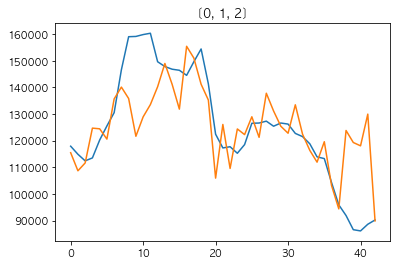

In [165]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df['y']) # rate
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title(f"{features}")

print(f'rmse : {round(rmse,4)}')
print(f'r2 : {round(r2_score(pred,y),4)}') # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음
# print(f'prediction : {round(lr.predict(quad.fit_transform(np.array(sub_df.loc[len(temp_score_df)-1,features]).reshape(1,-1)))[0],4)}')

print(f'true : {temp_score_df.iloc[-1,4]}')

rmse : 0.6868
r2 : 0.324
true : -0.03400001674890518


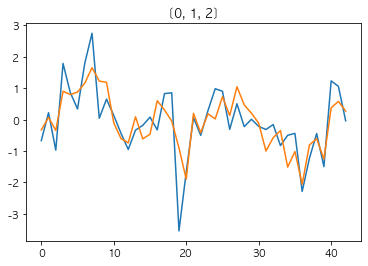

In [175]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df['y']) # rate
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title(f"{features}")

print(f'rmse : {round(rmse,4)}')
print(f'r2 : {round(r2_score(pred,y),4)}') # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음
# print(f'prediction : {round(lr.predict(quad.fit_transform(np.array(sub_df.loc[len(temp_score_df)-1,features]).reshape(1,-1)))[0],4)}')

print(f'true : {temp_score_df.iloc[-1,4]}')

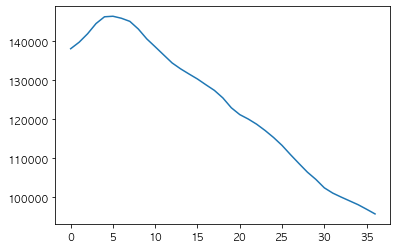

In [267]:
plt.plot(range(len(temp_score_df)),temp_score_df[3]) # rate


In [274]:
kakao_price = pd.read_csv('/Users/junho/Desktop/data/final_csv/kakao.csv')
Close = pd.DataFrame(kakao_price.loc[77:322,['Date','Close']]).reset_index()
Close['Date'] = pd.to_datetime(Close['Date'],format='%Y-%m-%d')
Close = Close.drop('index',axis=1)

Close

,Date,Close
0,2021-04-26,118000.0
1,2021-04-27,121500.0
2,2021-04-28,119500.0
3,2021-04-29,117000.0
4,2021-04-30,113500.0
...,...,...
241,2022-04-19,95100.0
242,2022-04-20,95100.0
243,2022-04-21,93600.0
244,2022-04-22,92000.0


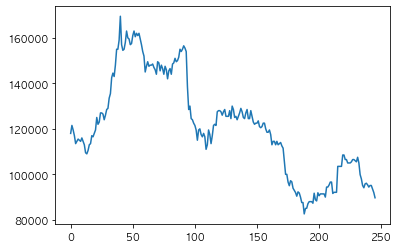

In [275]:
plt.plot(range(len(Close)),Close['Close']) # rate